In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [4]:
data = loadmat('ex4data1.mat')

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [6]:
weights = loadmat('ex4weights.mat')
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [7]:
y = data['y']
X = np.c_[np.ones((data['X'].shape[0], 1)), data['X']]
print('X: {} (with intercept)'.format(X.shape))
print('y: {}'.format(y.shape))

X: (5000, 401) (with intercept)
y: (5000, 1)


In [8]:
theta1, theta2 = weights['Theta1'], weights['Theta2']
print('theta1: {}'.format(theta1.shape))
print('theta2: {}'.format(theta2.shape))
params = np.r_[theta1.ravel(), theta2.ravel()]
print('params: {}'.format(params.shape))

theta1: (25, 401)
theta2: (10, 26)
params: (10285,)


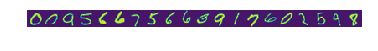

In [9]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample, 1:].reshape(-1, 20).T)
plt.axis('off');

In [10]:
def sigmoid(z):
    return (1/(1 + np.exp(-z)))

In [11]:
def sigmoidGradient(z):
    return (sigmoid(z)*(1-sigmoid(z)))

In [12]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, features, classes, reg):
    
    # When comparing to Octave code note that Python uses zero-indexed arrays.
    # But because Numpy indexing does not include the right side, the code is the same anyway.
    theta1 = nn_params[0:(hidden_layer_size*(input_layer_size+1))].reshape(hidden_layer_size,(input_layer_size+1))
    theta2 = nn_params[(hidden_layer_size*(input_layer_size+1)):].reshape(num_labels,(hidden_layer_size+1))

    m = features.shape[0]
    y_matrix = pd.get_dummies(classes.ravel()).as_matrix() 
    
    # Cost
    a1 = features # 5000x401
        
    z2 = theta1.dot(a1.T) # 25x401 * 401x5000 = 25x5000 
    a2 = np.c_[np.ones((features.shape[0],1)),sigmoid(z2.T)] # 5000x26 
    
    z3 = theta2.dot(a2.T) # 10x26 * 26x5000 = 10x5000 
    a3 = sigmoid(z3) # 10x5000
    
    J = -1*(1/m)*np.sum((np.log(a3.T)*(y_matrix)+np.log(1-a3).T*(1-y_matrix))) + \
        (reg/(2*m))*(np.sum(np.square(theta1[:,1:])) + np.sum(np.square(theta2[:,1:])))

    # Gradients
    d3 = a3.T - y_matrix # 5000x10
    d2 = theta2[:,1:].T.dot(d3.T)*sigmoidGradient(z2) # 25x10 *10x5000 * 25x5000 = 25x5000
    
    delta1 = d2.dot(a1) # 25x5000 * 5000x401 = 25x401
    delta2 = d3.T.dot(a2) # 10x5000 *5000x26 = 10x26
    
    theta1_ = np.c_[np.ones((theta1.shape[0],1)),theta1[:,1:]]
    theta2_ = np.c_[np.ones((theta2.shape[0],1)),theta2[:,1:]]
    
    theta1_grad = delta1/m + (theta1_*reg)/m
    theta2_grad = delta2/m + (theta2_*reg)/m
    
    return(J, theta1_grad, theta2_grad)


In [13]:
#Regularization parameter = 0
nnCostFunction(params, 400, 25, 10, X, y, 0)[0]

0.28762916516131887

In [14]:
#Regularization parameter = 1
nnCostFunction(params, 400, 25, 10, X, y, 1)[0]

0.3837698590909236

In [ ]:
[sigmoidGradient(z) for z in [-1, -0.5, 0, 0.5, 1]]